In [4]:
import norm_heatmap
import normalize
import experiment_normalized_depth_loss
import agg_depth_loss
import depth_loss
import tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

Set the path for your signal of interest (SOI), this is "stack_dir"
Set the path for your normalization signal (we use DAPI), this is "norm_dir"

In [5]:
stack_dir = os.path.abspath("/Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal/")
norm_dir = os.path.abspath("/Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/DAPI/")
stack_name = os.path.basename(stack_dir)
norm_name = os.path.basename(norm_dir)
base_dir = os.path.basename(os.path.dirname(norm_dir))
out_dir = os.path.abspath(os.path.join(os.path.abspath(''), '..', f"{base_dir}_{stack_name}n{norm_name}_out"))
print(out_dir)


/Users/Kyle/Desktop/Heat Map Code/prodivis/Phal_DAPI_PhalnDAPI_out


# Getting raw heatmap

In [6]:
stack_dir

'/Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal'

In [7]:
os.path.isdir(stack_dir)

True

In [8]:
tiffs = tools.get_files(stack_dir)

True


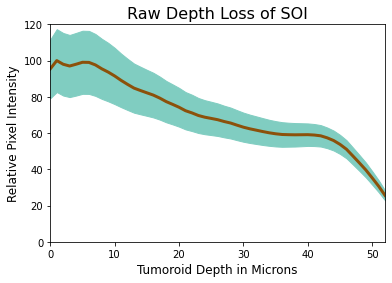

In [37]:
means = []
stds = []
for tiff in tiffs:
    means.append(normalize.tiff_mean(tiff, 0, -1, True, 0))
    stds.append(normalize.tiff_std(tiff, 0, -1, True, 0))
# means = vector consisting of average signal at that slice
max_mean = max(means)
for i, mean in enumerate(means):
    new_mean = (mean/max_mean)*100.
    means[i] = new_mean
means = np.array(means)
stds = np.array(stds)
plt.plot(np.arange(0, len(means)), means, color="#8c510a", linewidth = 3)
plt.fill_between(range(0,53), means-stds, means+stds, color="#80cdc1")
plt.title('Raw Depth Loss of SOI', fontsize=16)
plt.ylim(0,120)
plt.xlim(0,52)
plt.ylabel('Relative Pixel Intensity', size=12)
plt.xlabel('Tumoroid Depth in Microns', size=12)
plt.savefig("raw.png", dpi=300)
#Need to report y axis as %brightest pixel not raw pixel value
# can we compare the raw SOI to DAPI intensity loss here?

In [10]:
imgs = norm_heatmap.stack(tiffs, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal...
Completing post-processing for z, x and y composite(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal...


Text(0.5, 1.0, 'Raw Heat Map')

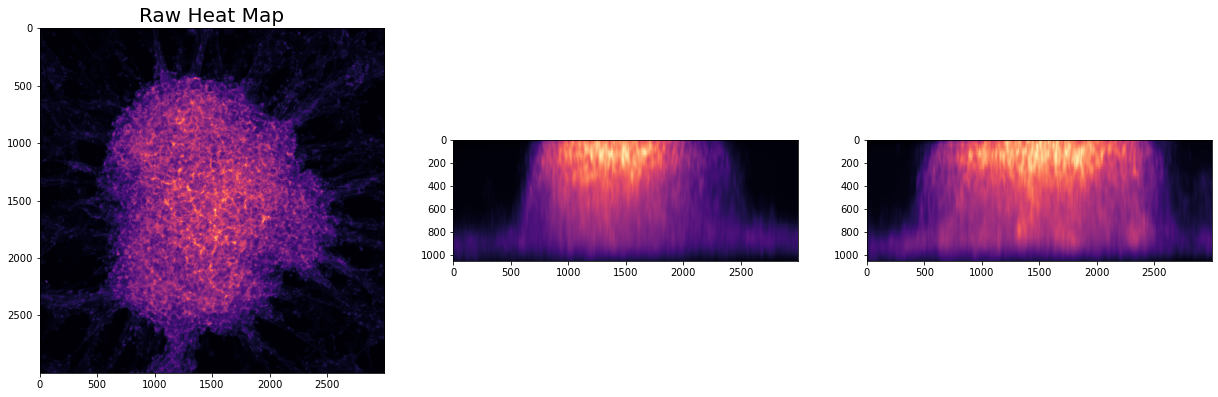

In [11]:
fig = plt.figure(figsize = (21, 7))
ax1 = fig.add_subplot(131)
ax1.imshow(imgs[0], cmap = 'magma')
ax2 = fig.add_subplot(132)
ax2.imshow(imgs[1], cmap = 'magma')
ax3 = fig.add_subplot(133)
ax3.imshow(imgs[2], cmap = 'magma')
ax1.set_title('Raw Heat Map', size=20)
# insert color bar for heat maps
# insert titles for front/side views
# remove or port scale in microns for heat maps

### Getting normalized heatmap

In [26]:
norms = tools.get_files(norm_dir)

True


In [27]:
means_norms = []
for norm_tiff in norms:
    means_norms.append(normalize.tiff_mean(norm_tiff, 0, -1, True, 0))

In [28]:
%%capture
norm_tiffs = normalize.mean_normalizer(tiffs, norms, 0, -1, True, False)

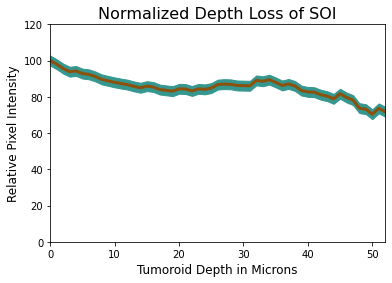

In [39]:
means_norms = []
stds_norms = []
for norm_tiff in norm_tiffs:
    means_norms.append(normalize.tiff_mean(norm_tiff, 0, -1, True, 0))
    stds_norms.append(normalize.tiff_std(tiff, 0, -1, True, 0))
# means = vector consisting of average signal at that slice
max_mean = max(means_norms)
for i, mean_norms in enumerate(means_norms):
    new_mean = (mean_norms/max_mean)*100.
    means_norms[i] = new_mean
means_norms = np.array(means_norms)
stds_norms = np.array(stds_norms)
plt.plot(np.arange(0, len(means_norms)), means_norms, color="#8c510a", linewidth = 3)
#plt.plot(np.arange(0, len(means)), means, color="#8c510a", linewidth = 3)
#plt.fill_between(range(0,53), means-stds, means+stds, color="#80cdc1")
plt.fill_between(range(0,53), means_norms-stds_norms, means_norms+stds_norms, color="#35978f")
plt.title('Normalized Depth Loss of SOI', fontsize=16)
plt.ylim(0,120)
plt.xlim(0,len(means)-1)
plt.ylabel('Relative Pixel Intensity', size=12)
plt.xlabel('Tumoroid Depth in Microns', size=12)
plt.savefig("normalized.png", dpi=300)
#autosave to path
# Want to compare SOI before and after, also compare DAPI/Norm signal before and after?
# insert key/legend here

In [16]:
imgs = norm_heatmap.stack(norm_tiffs, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal_rn_DAPI...
Completing post-processing for z, x and y composite(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal_rn_DAPI...


Text(0.5, 1.0, 'Normalized Heat Map')

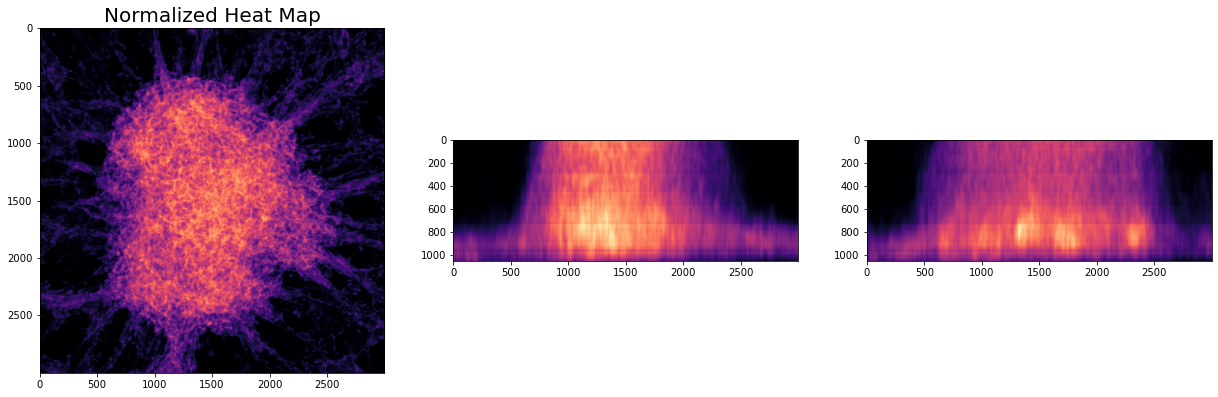

In [17]:
fig = plt.figure(figsize = (21, 7))
ax1 = fig.add_subplot(131)
ax1.imshow(imgs[0], cmap = 'magma')
ax2 = fig.add_subplot(132)
ax2.imshow(imgs[1], cmap = 'magma')
ax3 = fig.add_subplot(133)
ax3.imshow(imgs[2], cmap = 'magma')
ax1.set_title('Normalized Heat Map', size=20)

### Normalizing heatmap with tumoroid boundary

In [18]:
#getting boundary...
bools = normalize.get_norm_bool_idxs(norms, 0.6)

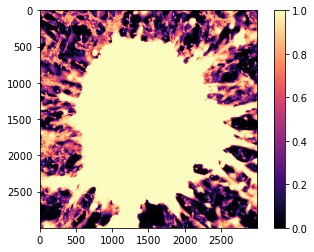

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
im = ax1.imshow(bools, cmap = 'magma')
plt.colorbar(im)

Text(0.5, 0, 'Tumoroid Depth in Microns')

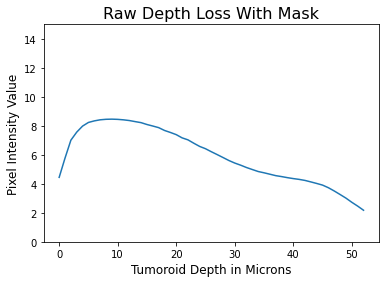

In [20]:
means = []
for norm_tiff in norms:
    means.append(normalize.tiff_mean(norm_tiff, 0, -1, True, bools))
plt.plot(np.arange(0, len(means)), means)
plt.title('Raw Depth Loss With Mask', fontsize=16)
plt.ylim(0,15)
plt.ylabel('Pixel Intensity Value', size=12)
plt.xlabel('Tumoroid Depth in Microns', size=12)

In [21]:
%%capture
norm_tiffs = normalize.mean_normalizer(tiffs, norms, 0, -1, True, True)

In [22]:
imgs = norm_heatmap.stack(norm_tiffs, ['z', 'x', 'y'], 20)

Generating composites for z, x and y view(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal_rn_im_DAPI...
Completing post-processing for z, x and y composite(s) from /Users/Kyle/Desktop/Heat Map Code/Heatmaps/Phal_DAPI/Phal_rn_im_DAPI...


Text(0.5, 1.0, 'Normalized Heat Map With Mask')

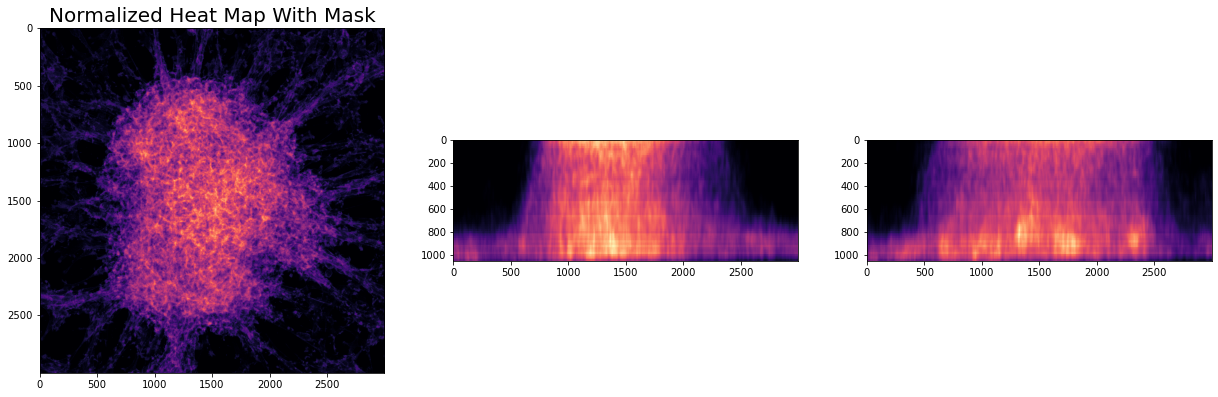

In [23]:
fig = plt.figure(figsize = (21, 7))
ax1 = fig.add_subplot(131)
ax1.imshow(imgs[0], cmap = 'magma')
ax2 = fig.add_subplot(132)
ax2.imshow(imgs[1], cmap = 'magma')
ax3 = fig.add_subplot(133)
ax3.imshow(imgs[2], cmap = 'magma')
ax1.set_title('Normalized Heat Map With Mask', size=20)